In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

In [35]:
def unnormalized_norm(x,mu=0.0,sigma=1.0):
    return np.exp(-1./2*np.square(1.*(x-mu)/sigma))

def importance_ratios(theta):
    return unnormalized_norm(theta)/sp.stats.t.pdf(theta,3)

In [36]:
#(a)
theta_cand=sp.stats.t.rvs(3,size=100)

In [37]:
IR=importance_ratios(theta_cand)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,  98.]),
 array([-73.26121172, -65.82746548, -58.39371924, -50.959973  ,
        -43.52622676, -36.09248052, -28.65873428, -21.22498804,
        -13.7912418 ,  -6.35749556,   1.07625068]),
 <a list of 10 Patch objects>)

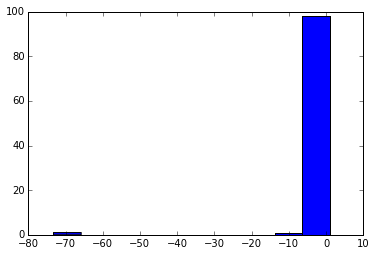

In [38]:
plt.hist(np.log(IR))

In [39]:
#(b)
E_importance_sampling=np.sum(theta_cand*IR)/np.sum(IR)
Var_importance_sampling=np.sum(np.square(theta_cand)*IR)/np.sum(IR)-np.square(E_importance_sampling)

In [40]:
print "simulated E: ",
print E_importance_sampling
print "simulated Var: ",
print Var_importance_sampling

simulated E:  0.026953989004
simulated Var:  1.09600015307


(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   3.00000000e+00,   5.00000000e+00,
          7.00000000e+00,   1.30000000e+01,   2.50000000e+01,
        

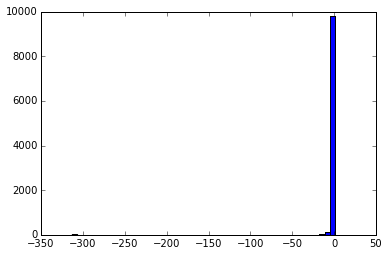

In [42]:
#(c)
theta_cand_c=sp.stats.t.rvs(3,size=10000)
IR_c=importance_ratios(theta_cand_c)

plt.hist(np.log(IR_c),bins=50)

In [43]:
E_importance_sampling_c=np.sum(theta_cand_c*IR_c)/np.sum(IR_c)
Var_importance_sampling_c=np.sum(np.square(theta_cand_c)*IR_c)/np.sum(IR_c)-np.square(E_importance_sampling_c)

print "simulated E: ",
print E_importance_sampling_c
print "simulated Var: ",
print Var_importance_sampling_c

simulated E:  0.00267690384569
simulated Var:  1.00333624909


In [45]:
#(d)
def normalized_weight(theta):
    S=len(theta)
    return importance_ratios(theta)*S/np.sum(importance_ratios(theta))
    
def S_eff(theta):
    return 1./np.sum(np.square(normalized_weight(theta)))

In [46]:
print S_eff(theta_cand_c)

9.23617200767e-05
